## import data and print data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


data = pd.read_csv('/Users/jittapat.a/Documents/code/ปี4/ML/HW03/archive/sin_noisy_40sample.csv')

X = data.iloc[:, 0].values.reshape(-1, 1)  # ฟีเจอร์ทั้งหมดที่ไม่ใช่ y
y = data['noisy_y'].values  # คอลัมน์ y

data

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,noisy_y
0,-1.00,1.0000,-1.000000,1.000000,-1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,0.622000
1,-0.95,0.9025,-0.857375,0.814506,-7.737809e-01,7.350919e-01,-6.983373e-01,6.634204e-01,-0.286854
2,-0.90,0.8100,-0.729000,0.656100,-5.904900e-01,5.314410e-01,-4.782969e-01,4.304672e-01,-0.251710
3,-0.85,0.7225,-0.614125,0.522006,-4.437053e-01,3.771495e-01,-3.205771e-01,2.724905e-01,-0.158866
4,-0.80,0.6400,-0.512000,0.409600,-3.276800e-01,2.621440e-01,-2.097152e-01,1.677722e-01,-0.562590
5,-0.75,0.5625,-0.421875,0.316406,-2.373047e-01,1.779785e-01,-1.334839e-01,1.001129e-01,-0.807702
6,-0.70,0.4900,-0.343000,0.240100,-1.680700e-01,1.176490e-01,-8.235430e-02,5.764801e-02,-0.810870
7,-0.65,0.4225,-0.274625,0.178506,-1.160291e-01,7.541889e-02,-4.902228e-02,3.186448e-02,-0.653002
8,-0.60,0.3600,-0.216000,0.129600,-7.776000e-02,4.665600e-02,-2.799360e-02,1.679616e-02,-1.089884
9,-0.55,0.3025,-0.166375,0.091506,-5.032844e-02,2.768064e-02,-1.522435e-02,8.373394e-03,-0.352580


### กำหนดพารามิเตอร์ degree ที่ต้องการค้นหา

In [9]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8]}

seeds = range(1, 11)

all_cross_score = []
all_nested_scores = []
best_params_list = []
cross_val_predictions = []
nested_val_predictions = []
num_one_cv = []

### function one cross_validation

one cross validation:
 mean RMES = 0.5858953522771305 
 Std = 0.14864492432345666


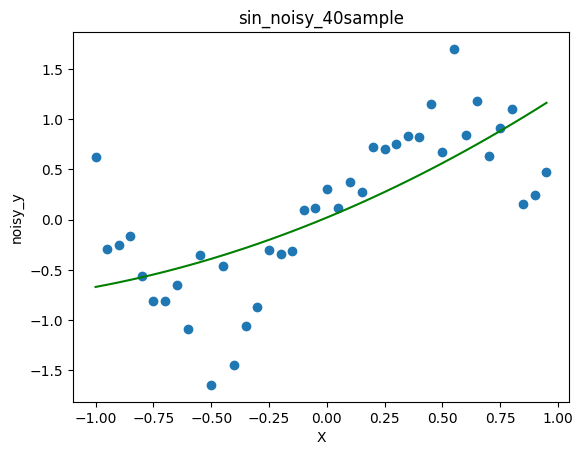

In [12]:
def one_cross_Validation(X, y, k_splits, random_state,num):
    kf = KFold(n_splits=k_splits, shuffle=True, random_state=random_state)
    model = make_pipeline(PolynomialFeatures(), LinearRegression())
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    model.fit(X, y)
    y_pred = model.predict(X)
    rmse_scores = np.sqrt(-mse_scores)
    return rmse_scores, y_pred,num

for seed in seeds:
    cross_score, cross_pred,num = one_cross_Validation(X, y, 5, seed,1)
    all_cross_score.append(cross_score)
    cross_val_predictions.append(cross_pred)
    num_one_cv.append(num)

mean_CV = np.mean(all_cross_score)
std_CV = np.std(all_cross_score)

# แสดงค่า RMSE และ standard deviation
print(f'one cross validation:\n mean RMES = {mean_CV} \n Std = {std_CV}')

# Plot ค่าที่ทำนายได้จาก cross validation ปกติและ nested cross validation
plt.title("sin_noisy_40sample")
plt.scatter(X, y, label='Data')
plt.xlabel("X")
plt.ylabel("noisy_y")

# Plot ค่า y ที่ทำนายได้เฉลี่ยของ ( cross validation )
mean_cross_pred = np.mean(cross_val_predictions, axis=0)
plt.plot(X, mean_cross_pred, color='green', label='Cross Validation')

### function nested_cross_validation

nested cross validation:
 mean RMES = 0.33557572574242994 
 Std = 0.0802461818470593
Best hyperparameters found in Nested Cross Validation for each seed:
Seed 1: {'polynomialfeatures__degree': 4}
Seed 2: {'polynomialfeatures__degree': 3}
Seed 3: {'polynomialfeatures__degree': 3}
Seed 4: {'polynomialfeatures__degree': 5}
Seed 5: {'polynomialfeatures__degree': 3}
Seed 6: {'polynomialfeatures__degree': 3}
Seed 7: {'polynomialfeatures__degree': 3}
Seed 8: {'polynomialfeatures__degree': 3}
Seed 9: {'polynomialfeatures__degree': 3}
Seed 10: {'polynomialfeatures__degree': 3}


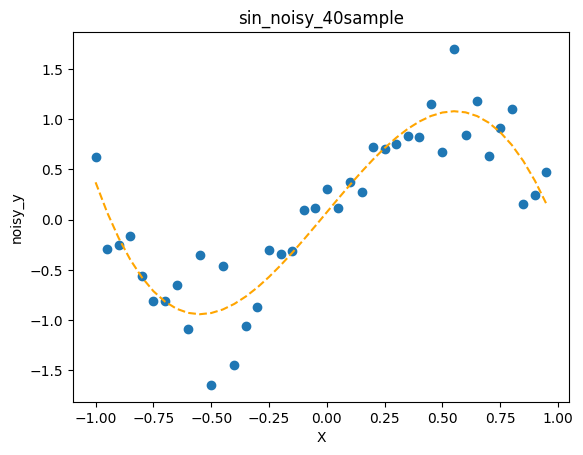

In [11]:
def Nested_cross_Validation(X, y, k_splits, random_state):
    inner_cv = KFold(n_splits=k_splits, shuffle=True, random_state=random_state)
    outer_cv = KFold(n_splits=k_splits, shuffle=True, random_state=random_state)

    model = make_pipeline(PolynomialFeatures(), LinearRegression())
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='neg_mean_squared_error')
    nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring='neg_mean_squared_error')

    grid_search.fit(X, y)
    y_pred = grid_search.predict(X)
    best_params = grid_search.best_params_
    return np.sqrt(-nested_scores), y_pred, best_params

for seed in seeds:
    nested_scores, nested_pred, best_params = Nested_cross_Validation(X, y, 5, seed)
    all_nested_scores.append(nested_scores)
    best_params_list.append(best_params)
    nested_val_predictions.append(nested_pred)


mean_nested = np.mean(all_nested_scores)
std_nested = np.std(all_nested_scores)

# แสดงค่า RMSE และ standard deviation
print(f'nested cross validation:\n mean RMES = {mean_nested} \n Std = {std_nested}')

# แสดงค่า hyperparameter ที่ดีที่สุดที่พบ
print(f'Best hyperparameters found in Nested Cross Validation for each seed:')
for i, params in enumerate(best_params_list, start=1):
    print(f'Seed {i}: {params}')

# Plot ค่าที่ทำนายได้จาก cross validation ปกติและ nested cross validation
plt.title("sin_noisy_40sample")
plt.scatter(X, y, label='Data')
plt.xlabel("X")
plt.ylabel("noisy_y")

# Plot ค่า y ที่ทำนายได้เฉลี่ยของ (nested cross validation)
mean_nested_pred = np.mean(nested_val_predictions, axis=0)
plt.plot(X, mean_nested_pred, color='orange', linestyle='--', label='Nested Cross Validation')